In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port
                                                             ,postgres_db))

usedu_df = pd.read_sql('select * from useducation', con=engine)
engine.dispose()

In [3]:
usedu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
usedu_df2 = usedu_df.copy()

In [5]:
usedu_df2['TOTAL_REVENUE'].describe()

count    1.280000e+03
mean     9.092082e+06
std      1.174519e+07
min      4.656500e+05
25%      2.186305e+06
50%      5.079546e+06
75%      1.085985e+07
max      8.921726e+07
Name: TOTAL_REVENUE, dtype: float64

In [6]:
usedu_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [7]:
usedu_df2['TOTAL_REVENUE'].isnull().sum() + 1280

1492

In [8]:
col_list= ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']

for col in col_list:
    usedu_df2.loc[:, col].fillna(usedu_df2.loc[:,col].mean(), inplace=True)

In [9]:
usedu_df2[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].isnull().sum()

TOTAL_REVENUE        0
TOTAL_EXPENDITURE    0
dtype: int64

In [10]:
usedu_df3 = usedu_df.copy()

In [11]:
for col in col_list:
    usedu_df3.loc[:, col].interpolate(inplace=True)

In [12]:
usedu_df3[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].isnull().sum()

TOTAL_REVENUE        0
TOTAL_EXPENDITURE    0
dtype: int64

In [13]:
usedu_df3[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
0,2678885.0,2653798.0
1,1049591.0,972488.0
2,3258079.0,3401580.0
3,1711959.0,1743022.0
4,26260025.0,27138832.0


### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values? ###

Let's find out with some visualization tools. I prefer to use interpolated data to mean inserted data. So I am going to use usedu_df3.
I am going to draw two column data as box plot and histogram

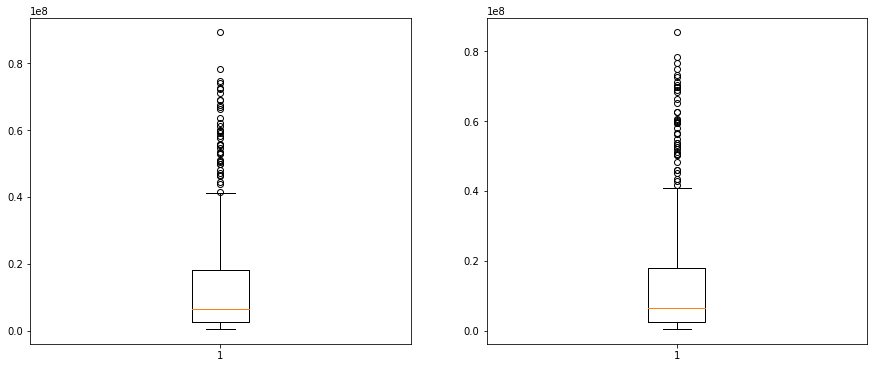

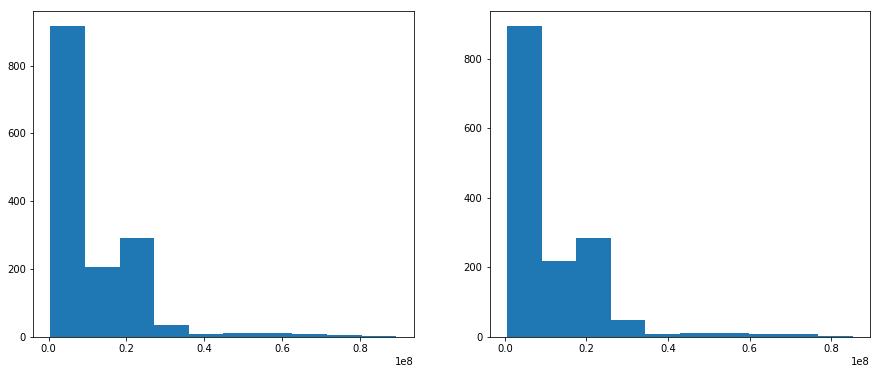

In [14]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.boxplot(usedu_df3['TOTAL_REVENUE'])

plt.subplot(1,2,2)
plt.boxplot(usedu_df3['TOTAL_EXPENDITURE'])
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(usedu_df3['TOTAL_REVENUE'])

plt.subplot(1,2,2)
plt.hist(usedu_df3['TOTAL_EXPENDITURE'])
plt.show()

Yeah, those are looked like having some outlier values.  
Now, let's use some stastical method to figure it out!  

The first one, we are going to check the **z-score** for both case.

In [15]:
from scipy.stats import zscore

TR_zscore = zscore(usedu_df3['TOTAL_REVENUE'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(TR_zscore > threshold))
    print('Number of outliers is: {}'.format(len(np.where(TR_zscore > threshold)[0])), '\n')

The score threshold is: 1
The indices of the outliers:
(array([   4,   56,  108,  137,  150,  161,  190,  213,  241,  264,  292,
        316,  344,  355,  367,  396,  407,  420,  449,  460,  472,  481,
        501,  512,  524,  552,  564,  576,  605,  616,  628,  656,  668,
        680,  685,  708,  719,  731,  737,  758,  760,  766,  771,  784,
        789,  793,  811,  813,  819,  824,  836,  842,  846,  863,  865,
        871,  876,  891,  897,  901,  919,  921,  927,  932,  944,  950,
        954,  971,  973,  976,  979,  984,  997, 1002, 1006, 1023, 1025,
       1028, 1031, 1036, 1048, 1053, 1057, 1075, 1077, 1083, 1088, 1101,
       1106, 1110, 1127, 1129, 1135, 1140, 1152, 1157, 1161, 1178, 1180,
       1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234, 1237, 1242,
       1254, 1259, 1263, 1280, 1282, 1285, 1286, 1287, 1288, 1289, 1290,
       1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301,
       1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1

In [16]:
TE_zscore = zscore(usedu_df3['TOTAL_EXPENDITURE'])

for threshold in range(1, 5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(TE_zscore > threshold))
    print('Number of outliers is: {}'.format(len(np.where(TE_zscore > threshold)[0])), '\n')

The score threshold is: 1
The indices of the outliers:
(array([   4,   56,   85,  137,  150,  161,  190,  213,  241,  264,  292,
        304,  316,  344,  355,  367,  396,  407,  420,  449,  460,  472,
        481,  501,  512,  524,  552,  564,  576,  605,  616,  628,  656,
        668,  680,  685,  708,  719,  731,  737,  758,  760,  766,  771,
        784,  789,  793,  811,  813,  819,  824,  836,  842,  846,  863,
        865,  871,  876,  891,  897,  901,  919,  921,  927,  932,  944,
        950,  954,  971,  973,  979,  984,  997, 1002, 1006, 1023, 1025,
       1031, 1036, 1048, 1053, 1057, 1075, 1077, 1083, 1088, 1101, 1106,
       1110, 1127, 1129, 1135, 1140, 1152, 1157, 1161, 1178, 1180, 1186,
       1191, 1203, 1208, 1212, 1229, 1231, 1237, 1242, 1254, 1259, 1263,
       1280, 1282, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293,
       1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304,
       1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1

I have a criteria that I will just consider the values upto 3 z-score. Because 3 z-score means that 95% data are in the range. So, It is enough for me and statistically.  

Now, let's check the data with **IQR (Interquartile Range) method**

In [17]:
q75, q25 = np.percentile(usedu_df3['TOTAL_REVENUE'], [75, 25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print('The score threshold is {}'.format(threshold))
    print('Number of outliers is {}'.format(len(np.where((usedu_df3['TOTAL_REVENUE'] > max_val) | (usedu_df3['TOTAL_REVENUE'] < min_val))[0])), '\n')


The score threshold is 1.0
Number of outliers is 50 

The score threshold is 1.5
Number of outliers is 40 

The score threshold is 2.0
Number of outliers is 33 

The score threshold is 2.5
Number of outliers is 21 

The score threshold is 3.0
Number of outliers is 12 

The score threshold is 3.5
Number of outliers is 6 

The score threshold is 4.0
Number of outliers is 1 

The score threshold is 4.5
Number of outliers is 1 



In [18]:
TE_q75, TE_q25 = np.percentile(usedu_df3['TOTAL_EXPENDITURE'], [75, 25])
TE_iqr = TE_q75 - TE_q25

for threshold in np.arange(1,5,0.5):
    TE_min_val = TE_q25 - (TE_iqr*threshold)
    TE_max_val = TE_q75 + (TE_iqr*threshold)
    print('The score threshold is {}'.format(threshold))
    print('Number of outliers is {}'.format(len(np.where((usedu_df3['TOTAL_EXPENDITURE'] <TE_min_val) 
                                                         | (usedu_df3['TOTAL_EXPENDITURE'] > TE_max_val))[0])), '\n')

The score threshold is 1.0
Number of outliers is 52 

The score threshold is 1.5
Number of outliers is 42 

The score threshold is 2.0
Number of outliers is 35 

The score threshold is 2.5
Number of outliers is 23 

The score threshold is 3.0
Number of outliers is 14 

The score threshold is 3.5
Number of outliers is 6 

The score threshold is 4.0
Number of outliers is 1 

The score threshold is 4.5
Number of outliers is 0 



Now, it is time to answer number 1 question that **The data has outliers.**

### 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.###

I am going to use 'WINSORIZE' from SCIPY and then I am going to make the data log scale.  
For the winsorizing, I will set the values of the outliers to the value of the 95%.  

Let's see how it works.

In [19]:
from scipy.stats.mstats import winsorize

winsorized_TR = winsorize(usedu_df3['TOTAL_REVENUE'], (0.025, 0.025))
winsorized_TE = winsorize(usedu_df3['TOTAL_EXPENDITURE'], (0.025, 0.025))

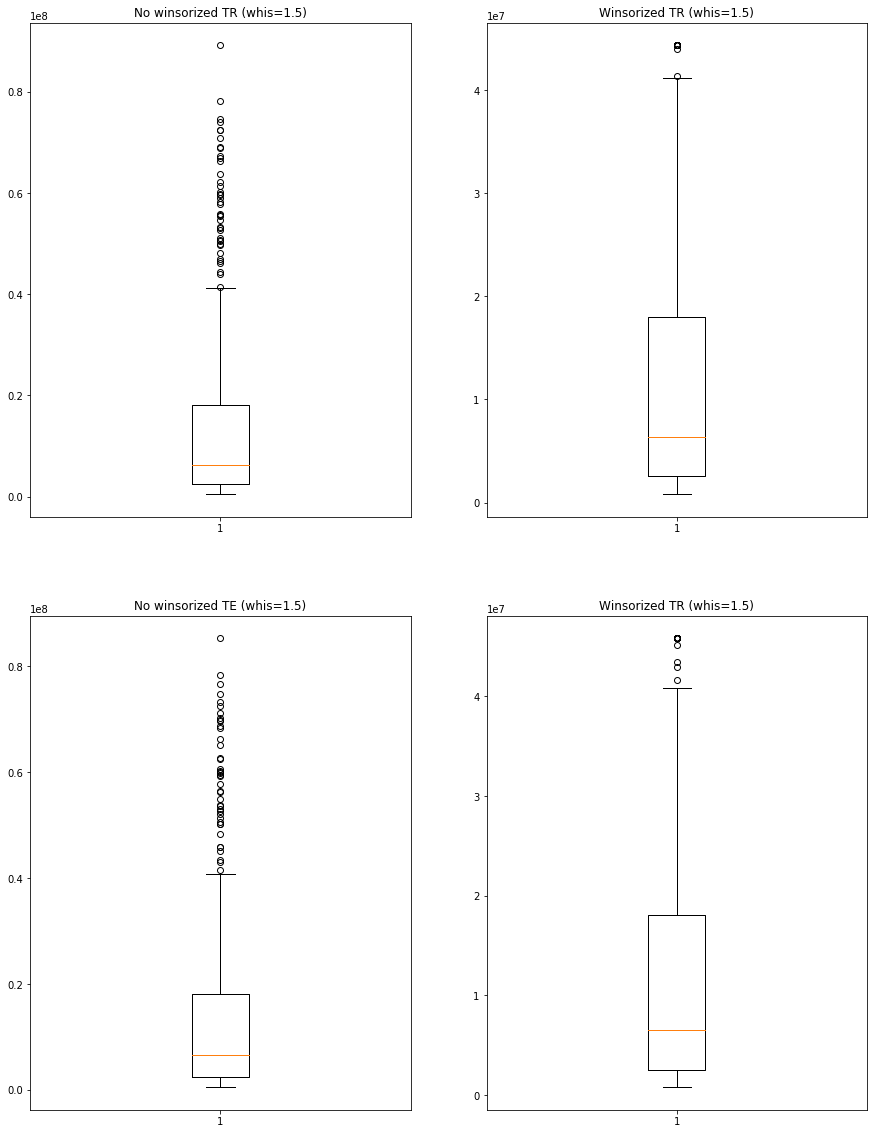

In [20]:
plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
plt.boxplot(usedu_df3['TOTAL_REVENUE'])
plt.title('No winsorized TR (whis=1.5)')

plt.subplot(2,2,2)
plt.boxplot(winsorized_TR)
plt.title('Winsorized TR (whis=1.5)')

plt.subplot(2,2,3)
plt.boxplot(usedu_df3['TOTAL_EXPENDITURE'])
plt.title('No winsorized TE (whis=1.5)')

plt.subplot(2,2,4)
plt.boxplot(winsorized_TE)
plt.title('Winsorized TR (whis=1.5)')
plt.show()

Next, let's draw some graph with log scale by histogram.

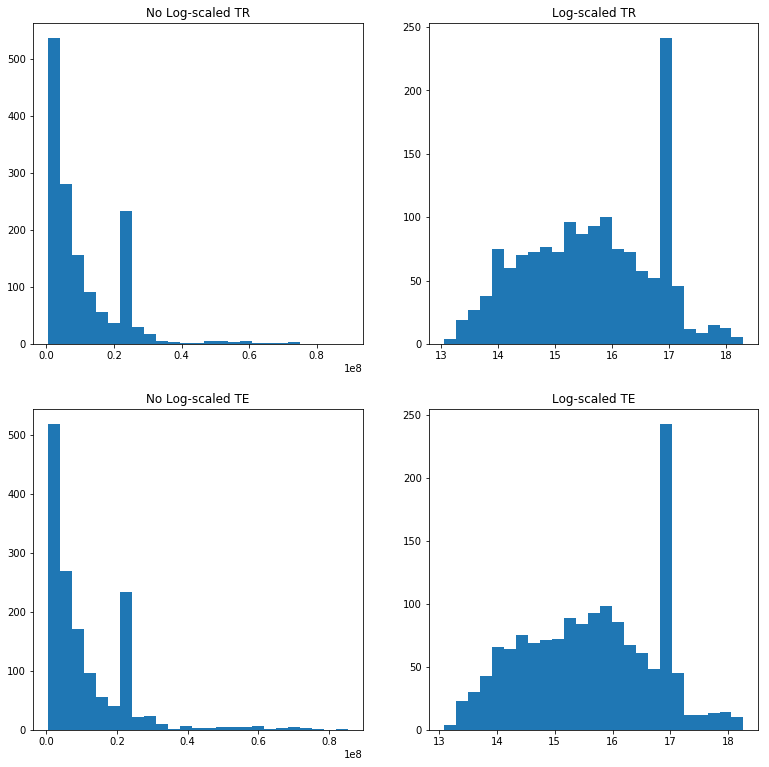

In [21]:
plt.figure(figsize=(13,13))

plt.subplot(2,2,1)
plt.hist(usedu_df3['TOTAL_REVENUE'], bins=25)
plt.title('No Log-scaled TR')

plt.subplot(2,2,2)
plt.hist(np.log(usedu_df3['TOTAL_REVENUE']), bins=25)
plt.title('Log-scaled TR')

plt.subplot(2,2,3)
plt.hist(usedu_df3['TOTAL_EXPENDITURE'], bins=25)
plt.title('No Log-scaled TE')

plt.subplot(2,2,4)
plt.hist(np.log(usedu_df3['TOTAL_EXPENDITURE']), bins=25)
plt.title('Log-scaled TE')
plt.show()

Now, let's draw some graphs with log-scaled data by boxplot.

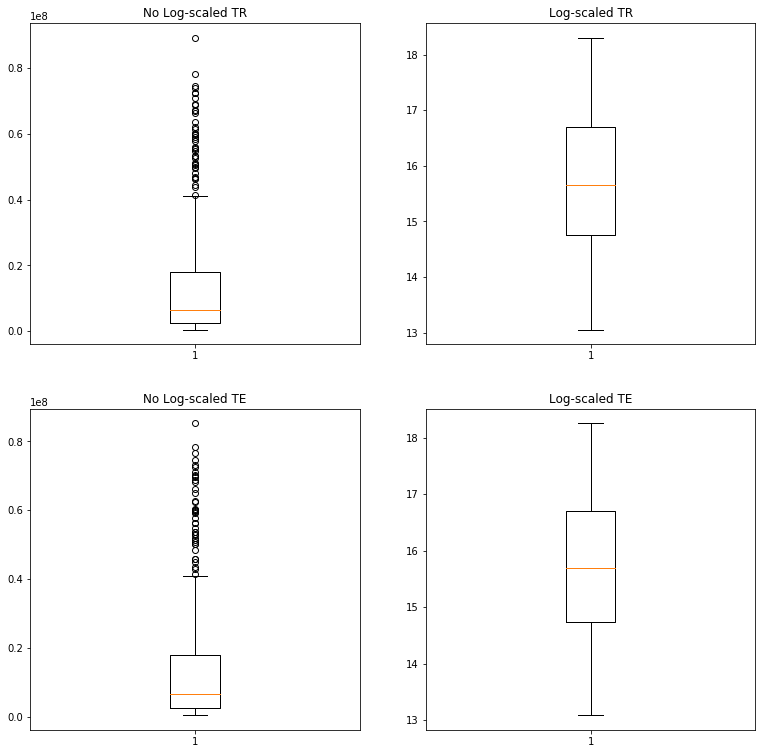

In [22]:
plt.figure(figsize=(13,13))

plt.subplot(2,2,1)
plt.boxplot(usedu_df3['TOTAL_REVENUE'])
plt.title('No Log-scaled TR')

plt.subplot(2,2,2)
plt.boxplot(np.log(usedu_df3['TOTAL_REVENUE']))
plt.title('Log-scaled TR')

plt.subplot(2,2,3)
plt.boxplot(usedu_df3['TOTAL_EXPENDITURE'])
plt.title('No Log-scaled TE')

plt.subplot(2,2,4)
plt.boxplot(np.log(usedu_df3['TOTAL_EXPENDITURE']))
plt.title('Log-scaled TE')
plt.show()

It is amazing that the boxplots of log-scaled data show that clean and neat graph.

### 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [23]:
deficit_budget = usedu_df3['TOTAL_REVENUE'] - usedu_df3['TOTAL_EXPENDITURE']

In [24]:
deficit_budget = pd.DataFrame(deficit_budget)

In [25]:
deficit_budget.columns = ['deficit budget']

In [26]:
deficit_budget

,deficit budget
0,25087.0
1,77103.0
2,-143501.0
3,-31063.0
4,-878807.0
5,-79653.0
6,112964.0
7,6449.0
8,-33413.0
9,200657.0


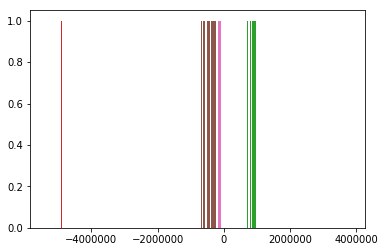

In [36]:
plt.hist(deficit_budget)
plt.show()

Let's look up visualizations first.

In [27]:
winsorized_db = winsorize(deficit_budget, (0.025, 0.025))

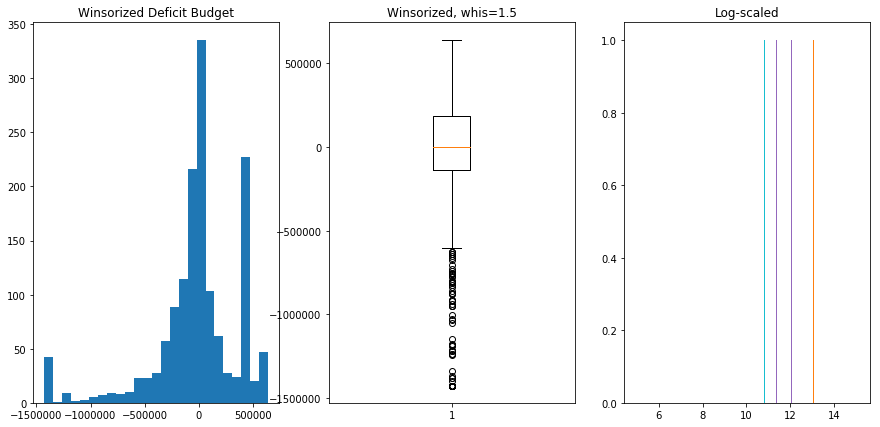

In [28]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
plt.hist(winsorized_db, bins=25)
plt.title('Winsorized Deficit Budget')

plt.subplot(1,3,2)
plt.boxplot(winsorized_db)
plt.title('Winsorized, whis=1.5')

plt.subplot(1,3,3)
plt.hist(np.log(deficit_budget), bins=25)
plt.title('Log-scaled')
plt.show()

The winsorized data is looked better than anything.  
So, I am going to choose the winsorized data. And I would like to look the differences of Z-score and IQR between winsorized one and not purified one.  

Okay, Let's see the original one.

In [67]:
zscore_db = zscore(deficit_budget)

for threshold in range(-5,5):
    print('The score threshold is {}'.format(threshold))
    print('The number of outlier is : {}'.format(len(np.where(zscore_db > threshold)[0])), '\n')

The score threshold is -5
The number of outlier is : 1482 

The score threshold is -4
The number of outlier is : 1477 

The score threshold is -3
The number of outlier is : 1465 

The score threshold is -2
The number of outlier is : 1439 

The score threshold is -1
The number of outlier is : 1395 

The score threshold is 0
The number of outlier is : 905 

The score threshold is 1
The number of outlier is : 56 

The score threshold is 2
The number of outlier is : 17 

The score threshold is 3
The number of outlier is : 7 

The score threshold is 4
The number of outlier is : 3 



In [53]:
db_q75, db_q25 = np.percentile(deficit_budget, [75, 25])
db_iqr = db_q75 - db_q25

for threshold in np.arange(1,5,0.5):
    db_min_val = db_q25 - (threshold*db_iqr)
    db_max_val = db_q75 + (threshold*db_iqr)
    print('The score threshold is {}'.format(threshold))
    print('Number of outliers is {}'.format(len(np.where((deficit_budget > db_max_val) | (deficit_budget < db_min_val))[0])), '\n')

The score threshold is 1.0
Number of outliers is 198 

The score threshold is 1.5
Number of outliers is 129 

The score threshold is 2.0
Number of outliers is 101 

The score threshold is 2.5
Number of outliers is 82 

The score threshold is 3.0
Number of outliers is 67 

The score threshold is 3.5
Number of outliers is 52 

The score threshold is 4.0
Number of outliers is 43 

The score threshold is 4.5
Number of outliers is 38 



### 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

Now, it is time for looking into winsorized date.  
How it worked well on the data.

In [66]:
zscore_wdb = zscore(winsorized_db)

for threshold in range(-5,5):
    print('The score threshold is {}'.format(threshold))
    print('The number of outlier is : {}'.format(len(np.where(zscore_wdb > threshold)[0])), '\n')

The score threshold is -5
The number of outlier is : 1492 

The score threshold is -4
The number of outlier is : 1492 

The score threshold is -3
The number of outlier is : 1443 

The score threshold is -2
The number of outlier is : 1419 

The score threshold is -1
The number of outlier is : 1346 

The score threshold is 0
The number of outlier is : 848 

The score threshold is 1
The number of outlier is : 298 

The score threshold is 2
The number of outlier is : 0 

The score threshold is 3
The number of outlier is : 0 

The score threshold is 4
The number of outlier is : 0 



In [62]:
wdb_q75, wdb_q25 = np.percentile(winsorized_db, [75, 25])
wdb_iqr = wdb_q75 - wdb_q25
print('wdb_iqr : {}'.format(wdb_iqr), '\n')
for threshold in np.arange(1,5,0.5):
    wdb_min_val = wdb_q25 - (threshold*wdb_iqr)
    wdb_max_val = wdb_q75 + (threshold*wdb_iqr)
    print('The score threshold is {}'.format(threshold))
    print('Number of outliers is {}'.format(len(np.where((winsorized_db > wdb_max_val) | (winsorized_db < wdb_min_val))[0])), '\n')

wdb_iqr : 324443.25 

The score threshold is 1.0
Number of outliers is 198 

The score threshold is 1.5
Number of outliers is 94 

The score threshold is 2.0
Number of outliers is 76 

The score threshold is 2.5
Number of outliers is 61 

The score threshold is 3.0
Number of outliers is 54 

The score threshold is 3.5
Number of outliers is 43 

The score threshold is 4.0
Number of outliers is 0 

The score threshold is 4.5
Number of outliers is 0 



I can find some outlier around negative standard deviation.  
<font color=red> I couldn't see whether it belong, but after I change the Z-score range from negative to positive, I could cleary check the outliers are existing on the negative SD. </font>

### 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

Yes, I could differentiate the differences explicitly.  
Before we cleaned up the data, I mean raw data, the range and distribution looked like a non-normal distribution. However, after working on the data with winsorizing, the data shows looked like a normal distribution.  

**Most of the data are concentrated between -3 sigma to 3 sigma, but there are still outliers, but smaller than before.**

### 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In this case, as I checked the data with log-scale method and winsorizing, <font color=red> It shows that winsorizing was perfectly better than others. </font>